In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv("./Documents/Python Scripts/datasets/forex/Google_Stock_Price_Train.csv", index_col="Date", parse_dates=True)

In [3]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


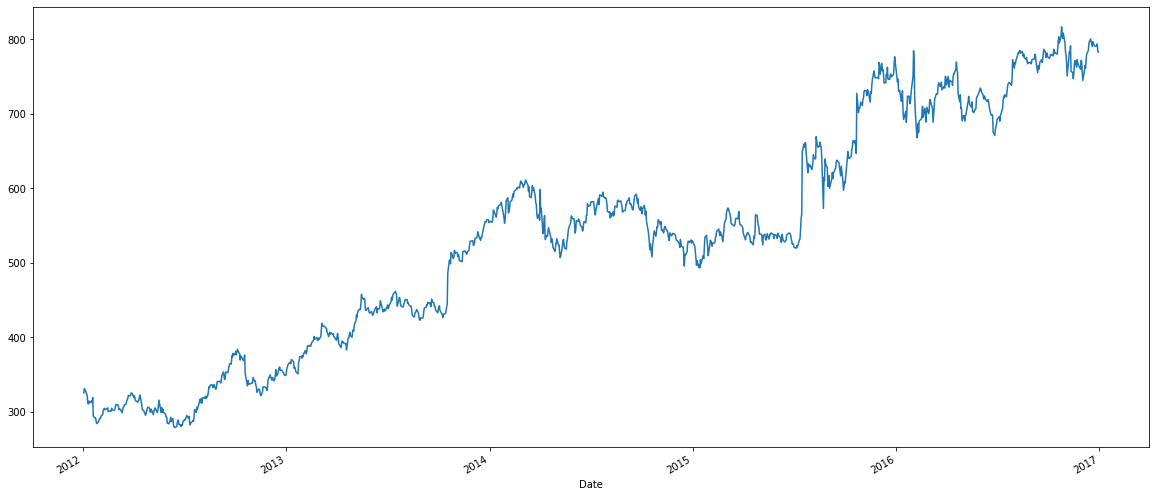

In [6]:
data["Open"].plot(figsize=((20,9)))

In [7]:
data["Close"] = data["Close"].str.replace(',','').astype(float)

In [8]:
data["Volume"] = data["Volume"].str.replace(',','').astype(float)

In [9]:
data.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


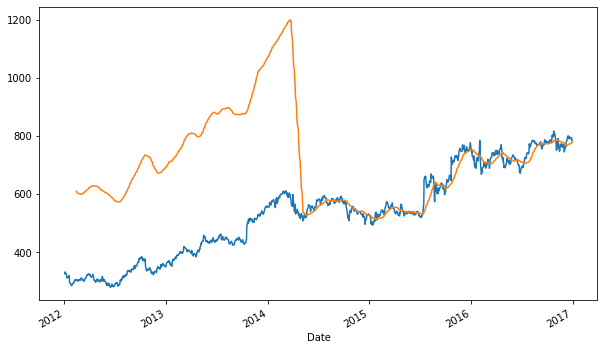

In [10]:
data["Open"].plot(figsize=(10,6))
data.rolling(window=30).mean()["Close"].plot()

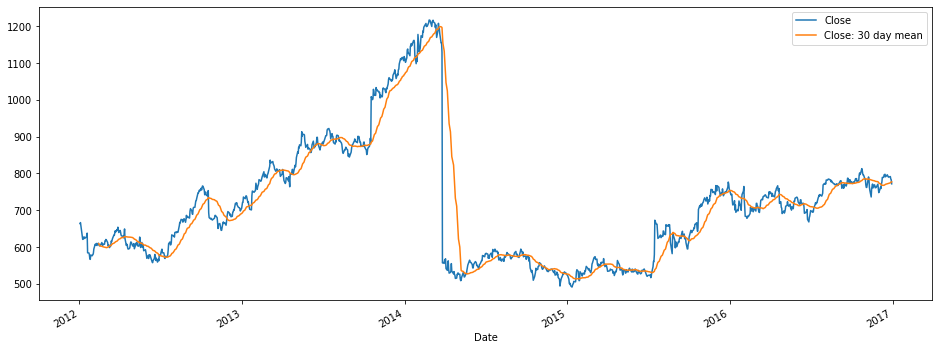

In [11]:
data['Close: 30 day mean']= data["Close"].rolling(window=30).mean()
data[['Close','Close: 30 day mean']].plot(figsize=(16,6))

In [12]:
trainig_set=data["Open"]
trainig_set=pd.DataFrame(trainig_set)

In [13]:
data.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 day mean     True
dtype: bool

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(trainig_set)    

In [15]:
X_train =[]
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\USUARIO\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USUARIO\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USUARIO\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USUARIO\Anaconda3\lib\site-packages\tensorflow\python\framework\d

In [17]:
regressor = Sequential()

In [18]:
regressor.add(LSTM(units= 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units =1))

In [19]:
regressor.compile(optimizer ='adam', loss ='mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0392
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0057
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 95/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016


In [29]:
data_test = pd.read_csv ("./Documents/Python Scripts/datasets/forex/Google_Stock_Price_Test.csv ",index_col ="Date",parse_dates= True)

In [30]:
data_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [31]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [32]:
data_test["Volume"] = data_test["Volume"].str.replace(',','').astype(float)


In [33]:
test_set = data_test['Open']
test_set = pd.DataFrame(test_set)

In [34]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [35]:
data_total =pd.concat((data["Open"], data_test["Open"]), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 80):
    X_test.append(inputs[ i- 60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price= regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [41]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


In [42]:
plt.plot(real_stock_price, color='red', label = 'real goole stock price')
plt.plot (predicted_stock_price, label ='predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock preice')
plt.legend()
plt.show()

NameError: name 'real_stock_price' is not defined

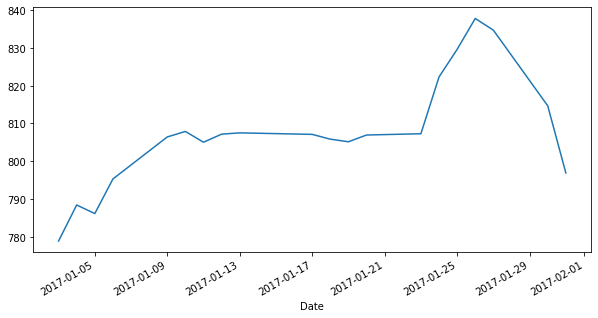

In [38]:
data_test["Open"].plot(figsize=((10,5)))